In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [3]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력 default:20
pd.set_option('display.max_rows', 10) #None으로 설정하면 모든 행 출력 default: 50

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력 default:60

In [4]:
# 정규화
import re

In [5]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-06 10:29:53.910254


'2025-01-06'

In [6]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류","\n 신정환 카카오 전 CTO도 합류AI 기업 발굴·투자사 지원 강화 사진 확대 신정환 카카오 전 부사장(좌), 안상일 하이퍼커넥트 전 대표(우)가 알토스벤처스의 벤처파트너로 합류했다. 미국의 한국계 벤처캐피탈 알토스벤처스가 하이퍼커넥트 공동창업자인 안상일 전 대표를 벤처파트너로 영입했다고 6일 밝혔다. 카카오 전 기술최고책임자(CTO)를 역임한 신정환 전 부사장도 함께 합류했다.알토스벤처스는 두 벤처파트너와 함께 포트폴리오 기업 지원 역량을 강화하고, 인공지능(AI)과 첨단 기술 분야 유망 초기 기업 발굴에 박차를 가할 계획이다.신정환 파트너는 서울대 건축학과를 졸업한 후 NHN에서 소프트웨어 엔지니어로 경력을 시작했다. 이후 NHN 재팬 팀장과 NHN 비즈니스 플랫폼 부장을 거쳐 카카오 CTO를 맡았다. 신 파트너는 카카오 재직 기간 동안 카카오톡, 카카오스토리와 같은 주요 서비스 개선과 수익화를 성공적으로 수행했다.안상일 파트너는 서울대 재료공학부를 졸업한 후 연쇄창업가로서 6개의 스타트업을 창업했다. 2014년 하이퍼커넥트를 공동 창업해 글로벌 영상 채팅 플랫폼 아자르와 라이브 스트리밍 서비스 하쿠나라이브를 개발했다. 서비스를 전 세계 230개국에 확장하며 하이퍼커넥트를 세계적인 기업으로 성장시켰다.이후 안 파트너는 2021년 하이퍼커넥트를 미국 나스닥 상장사인 매치그룹에 2조원에 매각한 후 매치그룹 아시아태평양 최고혁신책임자(CIO)를 역임했다.신 파트너는 지난해 9월, 안 파트너는 같은 해 11월 알토스벤처스에 합류했다. 두 파트너는 포트폴리오 기업 기술·제품 개발과 운영 효율성 성장 전략 수립을 도울 예정이다.한편 알토스벤처스는 1996년 미국 실리콘밸리를 기반으로 설립된 벤처캐피털로, 2006년 한국 투자를 본격화했다. 크래프톤, 우아한형제들(배달의민족), 하이퍼커넥트, 비바리퍼블리카(토스), 당근마켓 등에 투자했다.\n",2025-01-06 09:44:38


In [7]:
df.shape

(100, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사     100 non-null    object
 1   제목      100 non-null    object
 2   내용      100 non-null    object
 3   작성일시    100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [9]:
df.describe()

,언론사,제목,내용,작성일시
count,100,100,100,100
unique,2,100,100,93
top,매일경제,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류","\n 신정환 카카오 전 CTO도 합류AI 기업 발굴·투자사 지원 강화 사진 확대 신정환 카카오 전 부사장(좌), 안상일 하이퍼커넥트 전 대표(우)가 알토스벤처스의 벤처파트너로 합류했다. 미국의 한국계 벤처캐피탈 알토스벤처스가 하이퍼커넥트 공동창업자인 안상일 전 대표를 벤처파트너로 영입했다고 6일 밝혔다. 카카오 전 기술최고책임자(CTO)를 역임한 신정환 전 부사장도 함께 합류했다.알토스벤처스는 두 벤처파트너와 함께 포트폴리오 기업 지원 역량을 강화하고, 인공지능(AI)과 첨단 기술 분야 유망 초기 기업 발굴에 박차를 가할 계획이다.신정환 파트너는 서울대 건축학과를 졸업한 후 NHN에서 소프트웨어 엔지니어로 경력을 시작했다. 이후 NHN 재팬 팀장과 NHN 비즈니스 플랫폼 부장을 거쳐 카카오 CTO를 맡았다. 신 파트너는 카카오 재직 기간 동안 카카오톡, 카카오스토리와 같은 주요 서비스 개선과 수익화를 성공적으로 수행했다.안상일 파트너는 서울대 재료공학부를 졸업한 후 연쇄창업가로서 6개의 스타트업을 창업했다. 2014년 하이퍼커넥트를 공동 창업해 글로벌 영상 채팅 플랫폼 아자르와 라이브 스트리밍 서비스 하쿠나라이브를 개발했다. 서비스를 전 세계 230개국에 확장하며 하이퍼커넥트를 세계적인 기업으로 성장시켰다.이후 안 파트너는 2021년 하이퍼커넥트를 미국 나스닥 상장사인 매치그룹에 2조원에 매각한 후 매치그룹 아시아태평양 최고혁신책임자(CIO)를 역임했다.신 파트너는 지난해 9월, 안 파트너는 같은 해 11월 알토스벤처스에 합류했다. 두 파트너는 포트폴리오 기업 기술·제품 개발과 운영 효율성 성장 전략 수립을 도울 예정이다.한편 알토스벤처스는 1996년 미국 실리콘밸리를 기반으로 설립된 벤처캐피털로, 2006년 한국 투자를 본격화했다. 크래프톤, 우아한형제들(배달의민족), 하이퍼커넥트, 비바리퍼블리카(토스), 당근마켓 등에 투자했다.\n",2025.01.05 17:47
freq,50,1,1,3


In [10]:
# 중복된 행이 있는지 확인
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [11]:
df.duplicated().sum()

0

In [12]:
df['작성일시'].value_counts().sort_values(ascending=False).head().index

Index(['2025.01.05 17:47', '2025.01.03 17:42', '2025-01-03 17:54:24',
       '2025-01-05 16:57:38', '2025-01-05 16:06:10'],
      dtype='object', name='작성일시')

In [13]:
df[df.duplicated(subset='작성일시')].sort_values(by='작성일시')

,언론사,제목,내용,작성일시
31,매일경제,태양광株 '모처럼 맑음' 한화솔루션 11% 반등,"\n도널드 트럼프가 미국 대통령으로 당선된 후 내리막길을 걷던 태양광·신재생에너지 기업들이 테슬라의 에너지저장장치(ESS) 판매 뉴스에 반등했다. 3일 유가증권시장에서 한화솔루션은 10.71% 오른 1만7880원에 거래를 마쳤다. 한화솔루션우선주는 13.73% 올랐으며, HD현대에너지솔루션은 6.62% 상승했다.\n2일(현지시간) 테슬라는 작년 4분기 역대 최대 규모의 에너지저장시설을 판매했다고 발표했다. 이 소식에 퍼스트솔라가 5.8%, 솔라에지가 8.82% 상승했다.\n[김제림 기자]\n\n",2025-01-03 17:54:24
12,매일경제,공매도 점검시스템 개발 완료,"\n\n\n거래소 6일부터 테스트 시작예정대로 3월 공매도 재개\n\n\n오는 3월 국내 증시 공매도 재개를 앞두고 한국거래소가 불법 공매도를 자동으로 탐지하는 전산 시스템을 개발했다. 5일 한국거래소는 공매도 중앙점검시스템(NSDS) 개발을 완료하고 6일부터 주요 기관투자자와 연계 테스트를 시작한다고 밝혔다.\nNSDS는 기관투자자의 자체 잔고 관리 시스템과 연계해 보고받은 투자자의 잔고 정보를 모든 매매 내역과 비교함으로써 불법 공매도를 점검하는 시스템이다.\n기관투자자가 제출한 잔고 정보와 한국거래소·대체거래소(ATS)에서 수집한 매매 정보를 비교해 불법 공매도를 자동 적출한다.\n한국거래소는 정부가 공매도 제도 개선을 발표한 직후인 지난해 7월부터 NSDS 개발에 착수했으며, 총 6개월간 시스템 설계·개발·구현 및 자체 테스트를 완료했다. 이후 한국거래소는 오는 2월까지 NSDS와의 인터페이스 연결과 데이터 정합성 등을 점검하고, 3월부터는 연계 테스트를 완수한 기관투자자를 대상으로 모의시장을 운영할 계획이다.\n[김대은 기자]\n\n",2025-01-05 16:06:10
7,매일경제,삼전 실적발표 앞두고 숨죽인 코스피,"\n외국인 수급이 돌아오면서 반등한 코스피가 삼성전자의 실적 발표 등 주요 이벤트를 앞두고 경계감이 높아질 전망이다. 이번주에는 세계 최대 정보기술(IT)·가전 전시회 'CES 2025', 미국 연방공개시장위원회(FOMC) 의사록 공개 등 증시를 좌우할 이벤트가 줄줄이 진행된다.\n5일 한국거래소에 따르면 지난주 코스피는 전주 대비 1.54% 상승한 2441.92에 마감했다. 5거래일 연속 하락하던 코스피는 윤석열 대통령에 대한 체포영장 집행과 미국발 호재에 힘입어 3일 1.79% 반등했다.\n이번주 증시의 이목은 8일로 예정된 삼성전자의 지난해 4분기 잠정실적 발표에 쏠려 있다. 증권가에서 삼성전자에 대한 실적 눈높이를 줄줄이 낮췄으나 실제로는 전망치보다 낮을 가능성도 존재한다.\n7일(현지시간)부터 개최되는 CES 2025는 국내 증시에 긍정적인 모멘텀으로 작용할 수 있다. 증권가에서는 올해 핵심 키워드가 인공지능(AI)이 될 것으로 예상하면서 실적이 뒷받침되는 업종에 대한 중장기 투자가 유효할 수 있다고 분석했다. 8일 발표되는 미국 연방준비제도(Fed·연준)의 12월 FOMC 의사록을 통해서는 금리 인하 지연에 대한 시장의 불안심리가 완화될 수 있다.\n매일경제와 크래프트테크놀로지스가 공동 개발한 AI 기반 위험관리지수 '붐&쇼크지수' 국내판과 미국판 위험 수치는 모두 0을 가리켰다.\n[김정석 기자]\n\n",2025-01-05 16:57:38
98,한국경제,"한국 증시, 드디어 '앞에서 1등'…외국인들 쓸어 담은 종목이","\n\n\n\n\n사진=게티이미지뱅크 \n\n 코스닥지수가 3일 3% 가까이 올라 700선을 돌파했다. 코스피지수도 약 2% 올랐다. 반도체주에 대한 기대치 개선과 외국인의 저가 매수세 유입 등이 증시 상승을 이끌었다. 코스닥지수는 3일 2.79% 상승한 705.76에 마감했다. 코스피지수는 1.79% 오른 2441.92에 장을 마쳤다. 이날 한국 증시는 중국 상하이지수(-1.57%), 대만 자취안지수(0.33%) 등 다른 아시아 주요국 대비 강세를 보였다. 연초 이후 코스닥지수는 4.08% 올라 같은 기간 주요국의 지수 중 상승률 1위를 기록했다.국내 정치불안 해소 전망에 저가 매력 부각…외국인 매수""반등 본격화 판단은 아직 일러…고환율·4분기 실적 둔화가 변수""고환율, 국내 정치 불안 등의 요인이 겹쳐 휘청이던 코스피·코스닥지수가 3일 모처럼 나란히 반등했다. 코스닥지수는 새해 들어 2거래일만 따지면 주요국 증시 지수 중 상승률 1위를 달렸다. 최근 국내 주요 종목이 저평가됐다는 인식이 커진 데다 고위공직자범죄수사처가 이날 윤석열 대통령 체포를 시도하자 국내 정치 불안이 곧 해소될 것이란 전망으로 매수세가 유입됐다. ○저가 매력 韓 증시 오래간만에 반등\n\n\n\n\n\n\n\n이미지 크게보기\n\n\n\n 이날 코스피지수는 1.79% 오른 2441.92에 마감했다. 최근 6거래일 만의 오름세다. 코스닥지수는 2.79% 급등하며 장을 마쳤다. 지수 상승을 이끈 건 외국인이었다. 이날 외국인은 유가증권시장에서 2845억원, 코스닥시장에서 1430억원어치를 순매수했다.2차전지, 반도체, 바이오 등 시가총액 상위 종목이 모처럼 힘을 냈다. 이날 LG에너지솔루션은 2.89% 상승했고 포스코홀딩스(3.6%), SK이노베이션(7.21%), 에코프로비엠(7.11%) 등도 강세였다. 한국 증시는 이날 주요국 증시보다 뜨거웠다. 대만 자취안지수와 홍콩 항셍지수는 각각 0.33%, 0.7% 오르는 데 그쳤다. 전날 미국 S&P500지수는 새해 첫 거래일에 0.22% 하락하며 마감했다.올해 증시를 개장한 국가만 비교하면 코스닥지수는 최근 2거래일간 4.08% 뛰어 미국 인도 영국 독일 프랑스 이스라엘 중국 대만 등 주요국 대표 지수 중 가장 상승률이 높았다. 지난해 코스닥지수가 21.74% 하락해 주요국 중 꼴찌를 한 것과 대비된다.전문가들은 한국 증시 저평가가 심화하자 연초 저가 매수를 노린 자금이 유입된 결과라고 분석했다. 코스피지수의 12개월 후행 주가순자산비율(PBR)은 전날 기준 0.87배에 불과했다. 상장사들의 시가총액 합산액이 장부가 합산액에도 못 미친다.중국 인민은행이 이달 사실상의 금리인 ‘지급준비율’을 낮출 것이란 전망이 나온 점도 국내 증시엔 긍정적이라는 평가가 나온다. 중신증권 등 중국 증권사들은 최근 발표한 보고서에서 “과거 인민은행의 춘제(설) 전 운영을 보면 현금 인출 증가에 대비해 유동성을 관리해왔다”며 “지준율이 0.5% 낮아지면 장기 자금 1조위안(약 200조원)가량이 풀리는 효과가 나올 것”이라고 했다.이날 공수처가 윤 대통령 체포를 시도한 가운데 국내 정치 불안이 곧 사그라들 것이란 전망도 증시에 영향을 줬다. 이경민 대신증권 연구원은 “최근 미국 증시가 5거래일 연속 하락한 반면 한국은 정치적 불확실성이 안정되는 분위기가 나오면서 증시의 저가 매력이 부각되고 있다”고 했다. 이날 2% 이상 오르던 코스피지수는 오후 1시30분께 공수처가 체포영장 집행 중지를 선언하자 5분 만에 15포인트 이상 밀려 상승 폭을 낮췄다. ○“실적·환율이 추세 전환 결정”증권가에서는 지수가 당분간 바닥을 다지며 반등을 모색하는 상황이 이어질 것으로 보고 있다. 그동안 코스피·코스닥지수가 연간 기준 하락 마감하면 다음 해 1월 증시가 상대적으로 강세를 보였다. 코스닥지수는 2022년 한 해 34.3% 떨어졌지만 이듬해인 2023년 1월에는 9.01% 올랐다. 2018년에는 한 해 동안 15.38% 빠진 뒤 2019년 1월 6.01% 반등했다.이은택 KB증권 연구원은 “코스닥시장은 보통 많이 빠진 다음 해 상반기에 되돌림이 크게 나타나는 게 일반적”이라며 “실적 모멘텀이 좋은 바이오 종목이 반등을 주도할 가능성이 높다”고 했다.다만 여전히 높은 환율 수준과 작년 4분기 기업 실적 둔화가 증시 발목을 잡을 것이란 우려는 이어졌다. 유명간 미래에셋증권 연구원은 “국내 증시 상승세가 지속되기 위해서는 외국인 수급 환경 개선이 필요하다”며 “상승장이 본격화하려면 실적 하향 조정 속도가 둔화하고 환율도 더 안정돼야 한다”고 했다.배태웅 기자 btu104@hankyung.com\n",2025.01.03 17:42
7

In [14]:
df.duplicated().describe()

count       100
unique        1
top       False
freq        100
dtype: object

In [15]:
df['언론사'].value_counts()

언론사
매일경제    50
한국경제    50
Name: count, dtype: int64

#### 텍스트 길이 분석

In [16]:
# 제목,내용 길이
df['제목_길이'] = df['제목'].str.len()
df['내용_길이'] = df['내용'].str.len()

In [17]:
# 제목,내용 토큰 갯수
# split() : 공백을 구분자로 list로 반환해주기때문에 str 두번써야됨
df['제목_토큰_갯수'] = df['제목'].str.split().str.len()
df['내용_토큰_갯수'] = df['내용'].str.split().str.len()

In [18]:
df[['제목_길이','제목_토큰_갯수','내용_길이','내용_토큰_갯수']].describe()

,제목_길이,제목_토큰_갯수,내용_길이,내용_토큰_갯수
count,100.000000,100.000000,100.000000,100.000000
mean,31.450000,6.720000,1318.080000,264.620000
std,8.359806,1.902046,1418.546003,289.437761
min,8.000000,2.000000,104.000000,18.000000
25%,27.000000,6.000000,716.750000,140.250000
50%,31.500000,7.000000,984.500000,196.000000
75%,37.000000,8.000000,1485.000000,296.000000
max,56.000000,13.000000,10276.000000,2077.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_갯수  100 non-null    int64 
 7   내용_토큰_갯수  100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


array([[<Axes: title={'center': '제목_길이'}>,
        <Axes: title={'center': '내용_길이'}>],
       [<Axes: title={'center': '제목_토큰_갯수'}>,
        <Axes: title={'center': '내용_토큰_갯수'}>]], dtype=object)

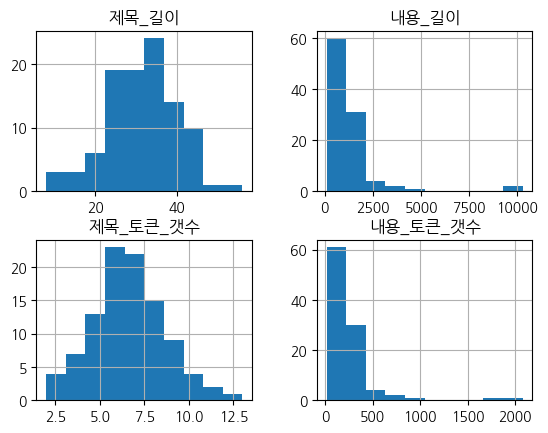

In [20]:
df.hist(bins=10)

In [21]:
df[df['제목_길이'] == df['제목_길이'].max()]

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수
16,매일경제,30억 이상 자산가 담당 삼성증권 임원의 조언···“변동성 장세 버티고 수익내는 힘은 결국 자산배분”,"\n 유정화 삼성증권 SNI·법인전략 담당 인터뷰“본인성향 맞춰 자산배분해 일관된 투자해야”“비즈니스맨 트럼프 취임이후 정책방향 촉각”“국장 현재는 관망...상반기 롱숏전략 대응”“고객들의 대체자산 비중 올해 점차 늘릴것” 사진 확대 유정화 삼성증권 SNI·법인전략 담당(상무). “트럼프 2기 시대의 도래 등 지금의 변동성 높은 시기를 잘 견뎌내는 힘은 교과서같은 표현이지만 ‘자산배분’에 있습니다”5일 유정화 삼성증권 SNI·법인전략 담당(상무)은 매일경제와 만나 “자신의 투자 성향에 따라 자산을 효과적으로 분산해 투자해야 변동성을 버텨내고, 수익으로 만들어낼 수 있다”고 강조했다.전통 자산에서의 주식과 채권 비중을 5:5 비율로 하기로 정했다면, 분기에 한 번씩은 꼭 비율에 맞춰 리밸런싱을 하는 형태다.유 상무는 “고객 중 한 분은 주식이 올라 평가액이 커지고, 주식 비중이 늘어나면 매 분기 주식은 팔고 채권은 더 사셨다. 주식이 나빠지면 채권 비중이 커지게 되는데 그때는 지수를 추종하는 상장지수펀드(ETF) 등을 매수하며 주식과 채권 비중을 맞췄다. 시장 상황과 관계없이 정해진 원칙에 따라 행동한 것”이라고 소회했다.자신이 보다 공격적인 투자자인지 보수적인 투자자인지를 판단해 성향에 맞는 비중을 정하고, 정한 비중으로 투자를 지속하는 게 결국엔 안정적인 투자 수익률로 돌아온다는 설명이다.그는 “국내 주식에만 집중투자한 고객들은 당연히 시장이 좋지 않을 때 손실 비율도 상대적으로 높다. 자신이 감당할 수 있는 수준의 자산 배분의 비중을 금융기관을 통해 충분히 소통해 정하는 게 필요하다”라고 말했다.이어 “심한 변동성을 겪기 힘들다면, 하방이 막혀있는 구조화된 상품이나 롱숏 전략을 쓰는 상품, 사모주식·채권 등 글로벌 대체자산 등을 선택해 변동성을 관리해가는 게 필요하다”고 강조했다.지난해 말까지 3년 동안 삼성증권의 연금본부장을 역임했던 유 상무는 올해부터는 SNI와 법인전략을 맡게 됐다.SNI는 예탁 금융자산이 30억원 이상인 초고액 자산가를 대상으로 한 삼성증권의 자산 서비스 브랜드로, 지난해 말 기준 서비스를 받는 자산가 수만 4003명에 달한다. SNI는 2010년 업계 최초로 등장해 지난 15년간 노하우를 축적해왔다. 사진 확대 유정화 삼성증권 SNI·법인전략 담당(상무). 올해는 트럼프 2기 시대가 본격 출범하며 변동성이 커질 것으로 예상하는 한편, 주식 등 위험자산 선호는 상반기에는 계속될 것이라고 내다봤다.유 상무는 “도널드 트럼프 당선인은 현재 견조한 미국 경기를 계속해서 유지시키는 데 집중할 것이다. 하반기에는 미국의 금리 인하 효과로 글로벌 제조업 경기 부흥 등이 이뤄질 것이라 기대한다”며 “올해는 미국 중심의 성장을 견인하는 핵심 주도주 위주 투자 전략이 유효하다”고 조언했다.실제로 삼성증권의 고액자산가들은 트럼프 대통령 취임식 이후의 정책 방향에 촉각을 곤두세우고 있다고 밝혔다.유 상무는 “당선인 시절의 정책 청사진과 취임 이후의 실제 정책은 다를 수 있다. 비즈니스맨 출신이라 유불리를 판단해 정책의 향방이 언제든 뒤바뀔 수 있다”며 “지금은 예측보다는 대응의 영역으로 접근해야 한다”고 지적했다.코스피 등 투자 매력도가 떨어진 국내증시는 상반기 중에 롱숏펀드를 활용해 대응하는 전략을 권유했다.유 상무는 “트럼프의 정책 방향이나 국내 정치 불확실성 등 때문에 코스피가 당장 턴어라운드 한다 말하기 어렵다”면서도 “지난해 12월 코스피 주가순자산비율(PBR)이 0.8배에 도달하는 등 매력적인 구간”이라고 설명했다.한편, 고액자산가들은 또 자산 배분의 관점에서 대체자산에 대한 관심도 커지고 있다고 했다. 전통자산이 주식과 채권 등 이외에 헤지펀드나 사모주식·채권, 부동산, 인프라, 금, 원자재 등에도 투자하는 것이다.유 상무는 “글로벌 패밀리오피스들은 전통자산과 대체자산의 비중을 6:4로 가져간다”며 “올해는 삼성증권에서도 글로벌 유수 운용사의 대체자산을 많이 소싱해 상품을 소개하고 고객들이 대체자산 비중을 키울 수 있도록 지원할 예정”이라고 밝혔다.특히 기관투자자들에게만 제공되는 운용사 상품을 개인들에게도 공급될 수 있도록 상품화도 진행 중이다.그는 “삼성증권은 골드만삭스, 칼라일, MBK파트너스 등 글로벌 탑티어 운용사의 사모대체펀드를 국내독점 공급하고 있다”며 “국내 우량 비상장 프로젝트딜, 사모대출투자 등 다양한 라인업의 패밀리오피스 전용상품을 해당 고객들에게 제공 중”이라고 강조했다.\n",2025-01-05 13:45:23,56,2189,13,473


In [22]:
df[df['제목_길이'] == df['제목_길이'].max()]['제목'].values

array(['30억 이상 자산가 담당 삼성증권 임원의 조언···“변동성 장세 버티고 수익내는 힘은 결국 자산배분”'],
      dtype=object)

#### 워드클라우드 시각화

- https://github.com/amueller/word_cloud

In [23]:
# 제목을 하나의 문자열로 만들기 (제목과 제목사이에 공백을 하나 줌)
news_title = ' '.join(df['제목'])

# 문자열도 인덱싱/슬라이싱이 가능
news_title[:100]

'‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류 메리츠증권, 美국채 실시간 거래 ‘미국채권 LIVE’ 서비스 시행 “삼성에스디에스, 이익률 개선 지연·성장 전략 구체화 기'

In [24]:
WordCloud?

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

In [25]:
def display_word_cloud(str, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','증시','한국']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

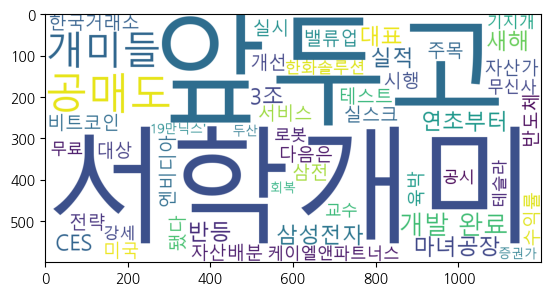

In [26]:
display_word_cloud(news_title,50)

In [27]:
# tmp_str = ''.join(df[df['제목'].str.contains('제주항공')]['내용'])
# tmp_word_cloud = display_word_cloud(tmp_str,50)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
tmp_str = ''.join(df[df['제목'].str.contains('이마트')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,100)

In [ ]:
tmp_word_cloud.words_

In [ ]:
tmp_str = ''.join(df[df['제목'].str.contains('트럼프')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [ ]:
tmp_str = ''.join(df[df['제목'].str.contains('환율')]['내용'])
tmp_word_cloud = display_word_cloud(tmp_str,50)

In [ ]:
tmp_word_cloud.words_

#### 형태소 분석기로 특정품사만 추출하기

In [ ]:
# !pip install pecab

In [45]:
from pecab import PeCab
pecab = PeCab()

In [46]:
dir(pecab)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_tokenize',
 'morphs',
 'nouns',
 'pos',
 'postprocessor',
 'tokenizer']

In [47]:
text = '아버지가 방에 들어가신다 주말 여행 영남권'

In [48]:
print(pecab.morphs(text))
print(pecab.nouns(text))
print(pecab.pos(text))
# print(pecab.postprocessor(text))

['아버지', '가', '방', '에', '들어가', '신다', '주말', '여행', '영남', '권']
['아버지', '방', '주말', '여행', '영남']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC'), ('주말', 'NNG'), ('여행', 'NNG'), ('영남', 'NNP'), ('권', 'XSN')]


In [49]:
# 처리시간이 걸리는 작업의 프로세스 진행률을 보여줌

from tqdm import tqdm
tqdm.pandas()

In [50]:
df['제목_명사'] = df['제목'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████| 100/100 [00:02<00:00, 46.50it/s]


In [ ]:
# pecab은 데이터가 많을경우는 속도가 너무 느림
# df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

### JDK 설치

1) 최신버전의 JAVA(JDK)를 설치
2) JAVA_HOME 환경변수를 추가
3) path 환경변수에 %JAVA_HOME%\bin; 추가

#### konlpy 설치
- pip install --upgrade pip
- pip install JPype1    (Java와 Python을 연결해주는 역할)
- pip install konlpy --upgrade
- https://konlpy.org/ko/latest/install


In [51]:
from konlpy.tag import Okt

In [52]:
okt = Okt()

In [30]:
dir(okt)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'jki',
 'morphs',
 'normalize',
 'nouns',
 'phrases',
 'pos',
 'tagset']

In [31]:
txt = '아버지 방에 들어가신다'
okt.morphs(txt)

['아버지', '방', '에', '들어가신다']

In [32]:
okt.pos(txt)

[('아버지', 'Noun'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [33]:
okt.nouns(txt)

['아버지', '방']

In [53]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


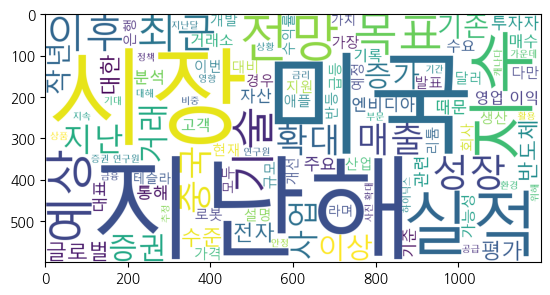

In [54]:
str = ''.join(df['내용_명사'])

dwc = display_word_cloud(str,100)

In [55]:
tmp = df.loc[df[df['내용_명사'].str.contains('테슬라')].index].head(1)['내용'].values[0]
type(tmp)

str

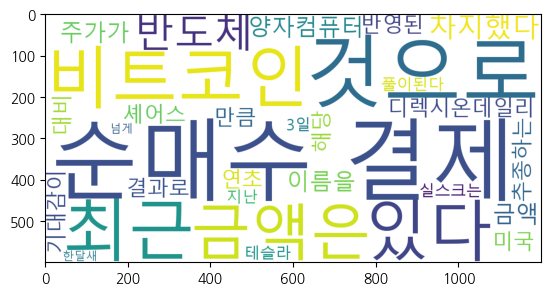

In [56]:
display_word_cloud(tmp,30)

In [57]:
len(okt.pos(tmp))

534

In [58]:
unique_words_dict = {}
for word, tag in okt.pos(tmp):
    if word not in unique_words_dict:
        unique_words_dict[word] = tag

# 딕셔너리의 길이 (고유한 단어 수)
len(unique_words_dict)

277

In [59]:
# 중복된 어휘 제거
unique_words = []
pos_list = []
for word, tag in okt.pos(tmp) :
    if word not in unique_words : 
        unique_words.append(word)
        pos_list.append(tag)

len(unique_words)
for item in zip(unique_words,pos_list) :
    print(item[0], item[1])


# for word, tag in pecab.pos(tmp) :
    # if word == '통해' :
    #     print(word, tag)
    




 Foreign
한 Determiner
달새 Noun
주가 Noun
1885% Number
넘게 Verb
상승 Noun
반도체 Noun
· Punctuation
비트코인 Noun
종목 Noun
도 Josa
인기 Noun



       Foreign
사진 Noun
확대 Noun
새해 Noun
들어 Verb
서학 Noun
개미 Noun
가 Josa
' Punctuation
픽 Noun
업종 Noun
은 Josa
와 Josa
양자컴퓨터 Noun
, Punctuation
등 Noun
인 Josa
것 Noun
으로 Josa
나타났다 Verb
. Punctuation

 Foreign
특히 Adverb
최근 Noun
급등 Noun
하고 Josa
있는 Adjective
실스크 Noun
( Punctuation
LAES Alpha
) Punctuation
순 Modifier
매수 Noun
결제 Noun
상위 Noun
권 Suffix
에 Josa
이름 Noun
을 Josa
올리며 Verb
관심 Noun
급부 Noun
상 Suffix
있다 Adjective
5일 Number
한국 Noun
예 Modifier
탁 Noun
원 Suffix
증권 Noun
정보 Noun
포털 Noun
세이브 Noun
로 Josa
따르면 Verb
이 Determiner
달 Noun
1일 Number
부터 Foreign
3일 Number
까지 Foreign
통한 Noun
외화 Noun
투자 Noun
금액 Noun
1 Number
위 Noun
는 Josa
디 Noun
렉시 Noun
온데 Verb
일리 Noun
세미 Noun
컨덕터 Noun
불 Noun
3 Number
X Alpha
셰 Noun
어스 Noun
SOXL Alpha
확인 Noun
됐다 Verb
해당 Noun
상장 Noun
지수 Noun
펀드 Noun
ETF Alpha
미국 Noun
필라델피아 Noun
를 Josa
배 Noun
추종 Noun
하는 Verb
레버리지 Noun
형 Suffix
다 Adverb
총 Noun
1억 Number
2

In [60]:
df.columns

Index(['언론사', '제목', '내용', '작성일시', '제목_길이', '내용_길이', '제목_토큰_갯수', '내용_토큰_갯수',
       '내용_명사', '제목_명사'],
      dtype='object')

In [61]:
df.to_csv(f'news_preprocessed_{today}.csv',index=False, encoding='utf-8-sig')

In [ ]:
dwc.words_

In [ ]:
okt.tagset?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect = CountVectorizer()

In [ ]:
X = cvect.fit_transform(df['제목_명사'])

In [ ]:
tmp = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

In [ ]:
tmp.sum().sort_values(ascending=False)